In [24]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import glob
import os 

In [25]:
npy_files = os.walk('/home/dipcik/PycharmPhd/motion-vqvae/checkpoints/t2m/residual_vq_replicate/eval/joints/',)
npy_files= sorted(npy_files)
print(npy_files)

[('/home/dipcik/PycharmPhd/motion-vqvae/checkpoints/t2m/residual_vq_replicate/eval/joints/', [], ['99.npy', '27.npy', '137.npy', '263.npy', '202.npy', '235.npy', '90.npy', '139.npy', '407.npy', '140.npy', '459.npy', '474.npy', '460.npy', '1.npy', '133.npy', '381.npy', '477.npy', '64.npy', '388.npy', '49.npy', '41.npy', '382.npy', '257.npy', '131.npy', '354.npy', '62.npy', '94.npy', '291.npy', '112.npy', '451.npy', '369.npy', '321.npy', '352.npy', '97.npy', '169.npy', '403.npy', '393.npy', '59.npy', '67.npy', '184.npy', '160.npy', '7.npy', '308.npy', '164.npy', '325.npy', '187.npy', '314.npy', '288.npy', '88.npy', '194.npy', '81.npy', '502.npy', '484.npy', '405.npy', '61.npy', '65.npy', '265.npy', '399.npy', '203.npy', '449.npy', '242.npy', '156.npy', '32.npy', '370.npy', '433.npy', '177.npy', '461.npy', '6.npy', '106.npy', '495.npy', '432.npy', '360.npy', '183.npy', '440.npy', '302.npy', '318.npy', '73.npy', '378.npy', '128.npy', '509.npy', '510.npy', '241.npy', '385.npy', '455.npy', '

In [26]:
npy_path = '/home/dipcik/PycharmPhd/motion-vqvae/checkpoints/t2m/residual_vq_replicate/eval/joints/'
flattened_motions = []
for i in range(512):
    npy_files = npy_path + str(i) + '.npy'

    data = np.load(npy_files)
  
    data = data.flatten()
    flattened_motions.append(data)

In [27]:
data = np.array(flattened_motions)
print(data.shape)

(512, 264)


/home/dipcik/PycharmPhd/momask-codes/.env_momask_vq/lib/python3.10/site-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (389) found smaller than n_clusters (512). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


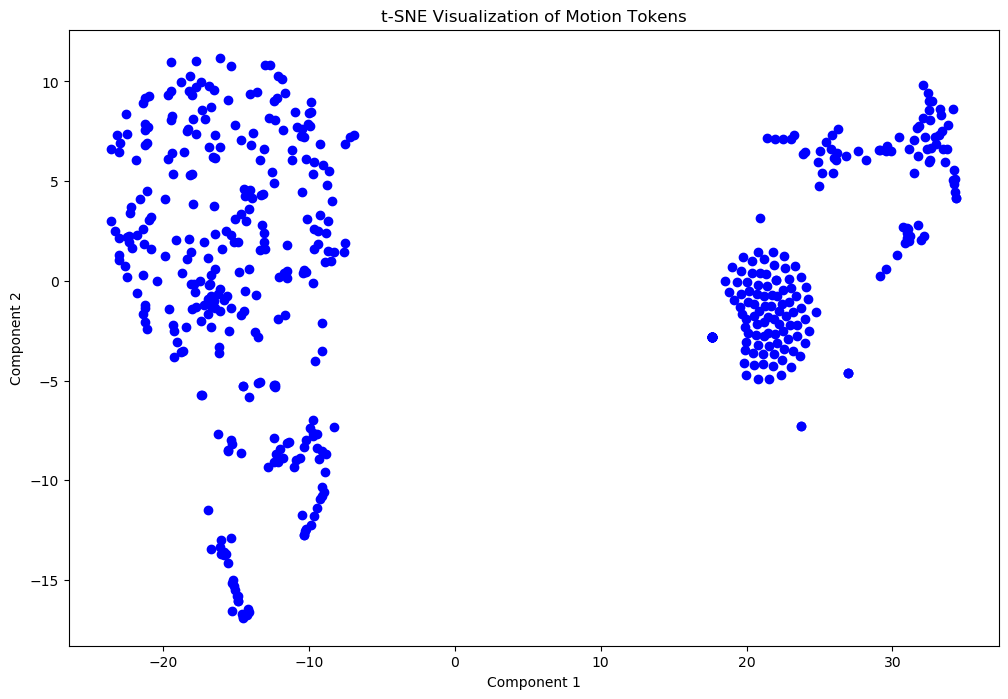

In [28]:

# Suppose `motions` is a list of sub-motions, each of shape (4, 22, 3)

# Convert to a 2D NumPy array where each row is a flattened sub-motion
data = np.array(flattened_motions)

# Create a KMeans object with 512 clusters
kmeans = KMeans(n_clusters=512, random_state=0)

# Fit the model
kmeans.fit(data)

# Get the centroids, which represent each token
centroids = kmeans.cluster_centers_

# Apply t-SNE to project the centroids into 2D space
tsne = TSNE(n_components=2, random_state=0)
centroids_2d = tsne.fit_transform(centroids)

# Plot the 2D projections
plt.figure(figsize=(12, 8))
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='blue', marker='o')
plt.title("t-SNE Visualization of Motion Tokens")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


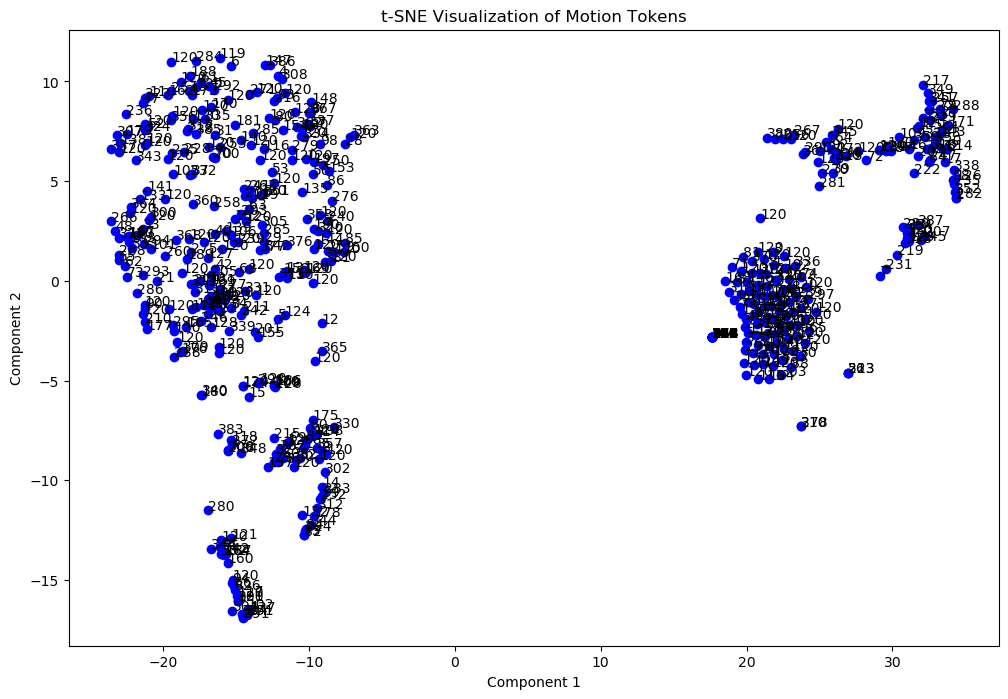

In [29]:
# Assuming labels is a list of labels for each centroid
labels = kmeans.labels_

plt.figure(figsize=(12, 8))
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='blue', marker='o')

# Add labels to the plot
for i, label in enumerate(labels):
    plt.text(centroids_2d[i, 0], centroids_2d[i, 1], str(label))

plt.title("t-SNE Visualization of Motion Tokens")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()